In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import itertools as it
import seaborn as sns
import matplotlib
import copy
# load new data
real_dict = pd.read_pickle("au_data/EmuResults.pickle")
return_dict = copy.deepcopy(real_dict)
n_vec = [200, 250, 300, 350]
u_vec =[24, 25, 30, 31]
meth_vec = ["vim2", "vim3", "vim4"]



for n in n_vec:
    for unit in u_vec:
        rel_dict = copy.deepcopy(real_dict[n][unit])
        
        meth_list = []
        for l in range(10):
            temp = "woof"
            loss = 100000
            for meth in meth_vec:                
                if rel_dict[l][meth]['loss'].item() < loss:
                    temp = meth
                    loss = rel_dict[l][meth]['loss'].item()
            
            rel_dict[l]['vim'] = rel_dict[l][temp]
            
            meth_list.append(rel_dict[l])
        
        return_dict[n][unit] = meth_list            
            
s_dict = return_dict        

# Figure 2

<>:39: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\m'
<>:43: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\m'
<>:43: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_1500895/899366358.py:39: SyntaxWarning: invalid escape sequence '\m'
  unit_replace = {24: '$\mathbf{v}_2$ 0-5% Centrality', 25:'$\mathbf{v}_2$ 5-10% Centrality' , 30: '$\mathbf{v}_3$ 0-5% Centrality', 31: '$\mathbf{v}_3$ 5-10% Centrality'}
/tmp/ipykernel_1500895/899366358.py:39: SyntaxWarning: invalid escape sequence '\m'
  unit_replace = {24: '$\mathbf{v}_2$ 0-5% Centrality', 25:'$\mathbf{v}_2$ 5-10% Centrality' , 30: '$\mathbf{v}_3$ 0-5% Centrality', 31: '$\mathbf{v}_

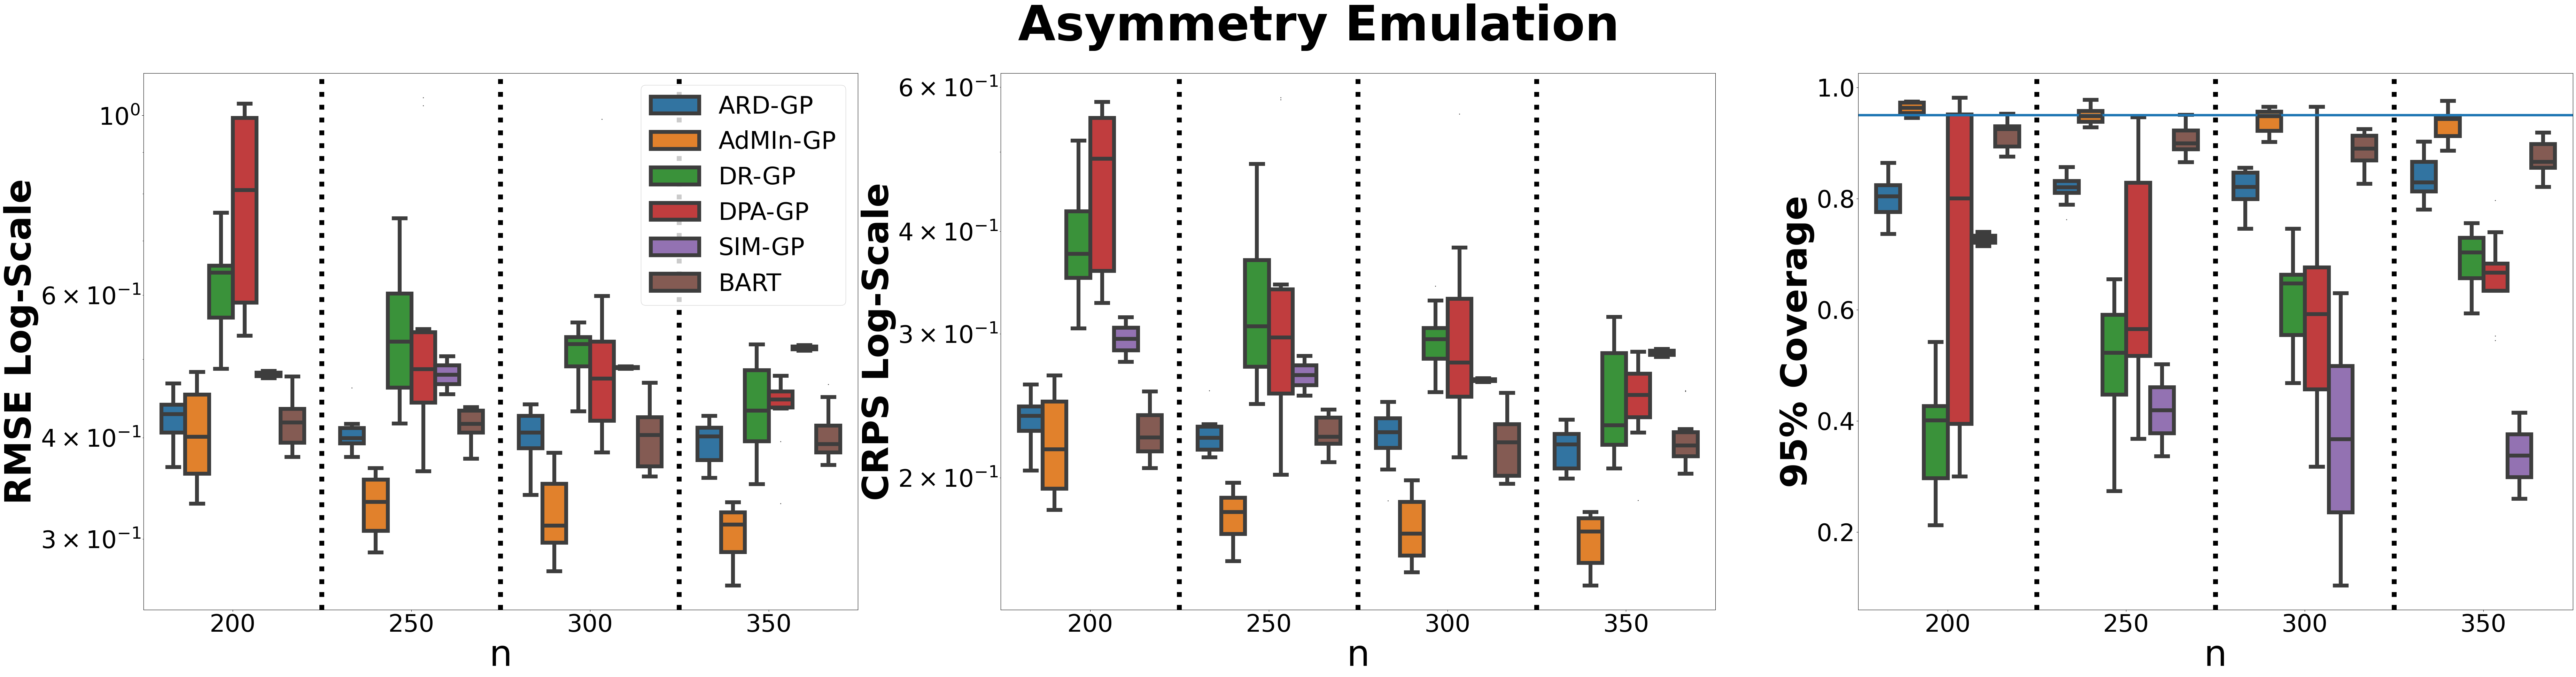

In [2]:
import matplotlib
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 40}

folds = 10
sample_list = [200, 250, 300, 350]
unit_list = [24, 25, 30, 31]
stat_list = ['rmse', 'nll', 'crps', 'cov']
meth_list = ['gpy', 'vim', 'dle', 'dpa']
fold_list = [i + 1 for  i in range(folds)]
combs = it.product(unit_list, meth_list, sample_list, stat_list, fold_list)

start_frame = pd.DataFrame(list(combs), columns = ["Observable", "Method", "n", "Statistic", "Fold"])


val = np.zeros(start_frame.shape[0])
for index, row in start_frame.iterrows():
    val[index] = s_dict[row[2]][row[0]][row[4] - 1][row[1]][row[3]]


        
        
g_frame = start_frame.join(pd.DataFrame(val, columns = ["Value"]))
sim_frame = pd.read_csv("R_Results/sim_result.csv")
sim_frame["Method"] = "SIM-GP"
g_frame = pd.concat([g_frame, sim_frame])

bart_frame = pd.read_csv("R_Results/sim_result_bart.csv")
bart_frame["Method"] = "BART"
g_frame = pd.concat([g_frame, bart_frame])


stat_replace = {'rmse': 'RMSE', 'crps': "CRPS", 'cov': "95% Coverage", "nll": "NLL"}
g_frame['Statistic'] = g_frame['Statistic'].replace(stat_replace)
met_replace = {'gpy': "ARD-GP", 'vim': 'AdMIn-GP','dle': 'DR-GP', 'dpa': 'DPA-GP'}
g_frame['Method'] = g_frame['Method'].replace(met_replace)

unit_replace = {24: '$\mathbf{v}_2$ 0-5% Centrality', 25:'$\mathbf{v}_2$ 5-10% Centrality' , 30: '$\mathbf{v}_3$ 0-5% Centrality', 31: '$\mathbf{v}_3$ 5-10% Centrality'}
g_frame["Observable"] = g_frame['Observable'].replace(unit_replace)

stat_list = ['RMSE', 'CRPS', '95% Coverage']
unit_list = ["$\mathbf{v}_3$ 5-10% Centrality"]
fig, axs = plt.subplots(1,3, figsize = (90, 20))

for i, stat in enumerate(stat_list):
    for j, unit in enumerate(unit_list):
        sns.boxplot(data = g_frame[ (g_frame["Statistic"] == stat_list[i]) & (g_frame["Observable"] == unit_list[j]) ], y = "Value", x = "n",  hue = "Method", 
                       ax =  axs[i], dodge= .25, fliersize=1, linewidth=8)

        axs[i].set_xlabel("n", fontsize = 75)
        #axs[i].set_title("Observable: {}".format(unit_list[j]), fontweight= 'bold')
        if i != 2:
             axs[i].set_yscale("log")
        
        if j > 0 or i > 0:
            axs[i].get_legend().remove()
        
        
        if j ==0 and i == 0:
             axs[i].legend(loc='upper center', bbox_to_anchor=(0.55, -0.1), ncol=3, fancybox=True, shadow=False)

            
        if i == 2:
            axs[i].set_ylabel(stat_list[i], fontweight = "bold", fontsize = 75)
            axs[i].axhline(y = .95)
        else:
            axs[i].set_ylabel("{} {}".format(stat_list[i], "Log-Scale"), fontweight = "bold", fontsize = 75)
        
        #if stat == "RMSE":
        #    axs[i].set_ylim((.25, .8))

        if stat == "95% Coverage":
            axs[i].axhline(y = .95, lw = 5)
            
        axs[i].tick_params(axis='both', which='major', labelsize=50)
        axs[i].tick_params(axis='both', which='minor', labelsize=50)
        [axs[i].axvline(x+.5,linestyle = ":", lw = 10, color = "black") for x in list(axs[i].get_xticks())[:-1]]
axs[0].legend(fontsize = 50)

fig.suptitle('Asymmetry Emulation', fontsize=100,  fontweight = 'bold')
plt.savefig('paper_plots/real_appetizer.png', dpi = 200, bbox_inches='tight')




# Figure 8


In [3]:
import matplotlib
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 70}

matplotlib.rc('font', **font)

stat_list = ['RMSE', 'CRPS']
unit_list = list(unit_replace.values())
fig, axs = plt.subplots(2, 4, figsize = (150, 60))

for i, stat in enumerate(stat_list):
    for j, unit in enumerate(unit_list):
        #sns.pointplot(data = g_frame[ (g_frame["Statistic"] == stat_list[i]) & (g_frame["Observable"] == unit_list[j]) ], y = "Value", x = "n", errorbar = 'sd', hue = "Method", 
        #              join = False, dodge = .4, ax = axs[j, i])
        sns.boxplot(data = g_frame[ (g_frame["Statistic"] == stat_list[i]) & (g_frame["Observable"] == unit_list[j]) ], y = "Value", x = "n",  hue = "Method", 
                       ax = axs[i, j], dodge= .25, fliersize=1, linewidth=12)
        
        if j == 0:
            axs[i,j].set_ylabel("{} Log-Scale".format(stat_list[i]), fontweight = 'bold', fontsize = 100)
        else:
             axs[i,j].set_ylabel(None)
        axs[i,j].set_xlabel("n", fontweight = 'bold', fontsize = 100)
        
        if i == 0:
            axs[i,j].set_title("{}".format(unit_list[j]), fontweight = 'bold', fontsize = 125)
        
        if i == 1:
            axs[i, j].set_ylim((.13, .75))
            
        if i == 0:
            axs[i, j].set_ylim((.25, 1))

        
        axs[i,j].set_yscale("log")
        axs[i, j].get_legend().remove()


        #axs[i,j].get_legend().remove()
        if j ==0 and i == 1:
            axs[i, j].legend(loc='upper center', bbox_to_anchor=(0.9, -0.15), ncol=3, fancybox=True, shadow=False)
        [axs[i,j].axvline(x+.5,linestyle = ":", lw = 10, color = "black") for x in list(axs[i,j].get_xticks())[:-1]]

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.3)

plt.savefig('paper_plots/real_exp.png', dpi = 100, bbox_inches='tight')


# Figure 9

<>:86: SyntaxWarning: invalid escape sequence '\m'
<>:86: SyntaxWarning: invalid escape sequence '\m'
<>:86: SyntaxWarning: invalid escape sequence '\m'
<>:86: SyntaxWarning: invalid escape sequence '\m'
<>:115: SyntaxWarning: invalid escape sequence '\m'
<>:86: SyntaxWarning: invalid escape sequence '\m'
<>:86: SyntaxWarning: invalid escape sequence '\m'
<>:86: SyntaxWarning: invalid escape sequence '\m'
<>:86: SyntaxWarning: invalid escape sequence '\m'
<>:115: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_1500895/2044988917.py:86: SyntaxWarning: invalid escape sequence '\m'
  unit_replace = {24: '$\mathbf{v}_2$ 0-5% Centrality', 25:'$\mathbf{v}_2$ 5-10% Centrality' , 30: '$\mathbf{v}_3$ 0-5% Centrality', 31: '$\mathbf{v}_3$ 5-10% Centrality'}
/tmp/ipykernel_1500895/2044988917.py:86: SyntaxWarning: invalid escape sequence '\m'
  unit_replace = {24: '$\mathbf{v}_2$ 0-5% Centrality', 25:'$\mathbf{v}_2$ 5-10% Centrality' , 30: '$\mathbf{v}_3$ 0-5% Centrality', 31: '$\mathbf

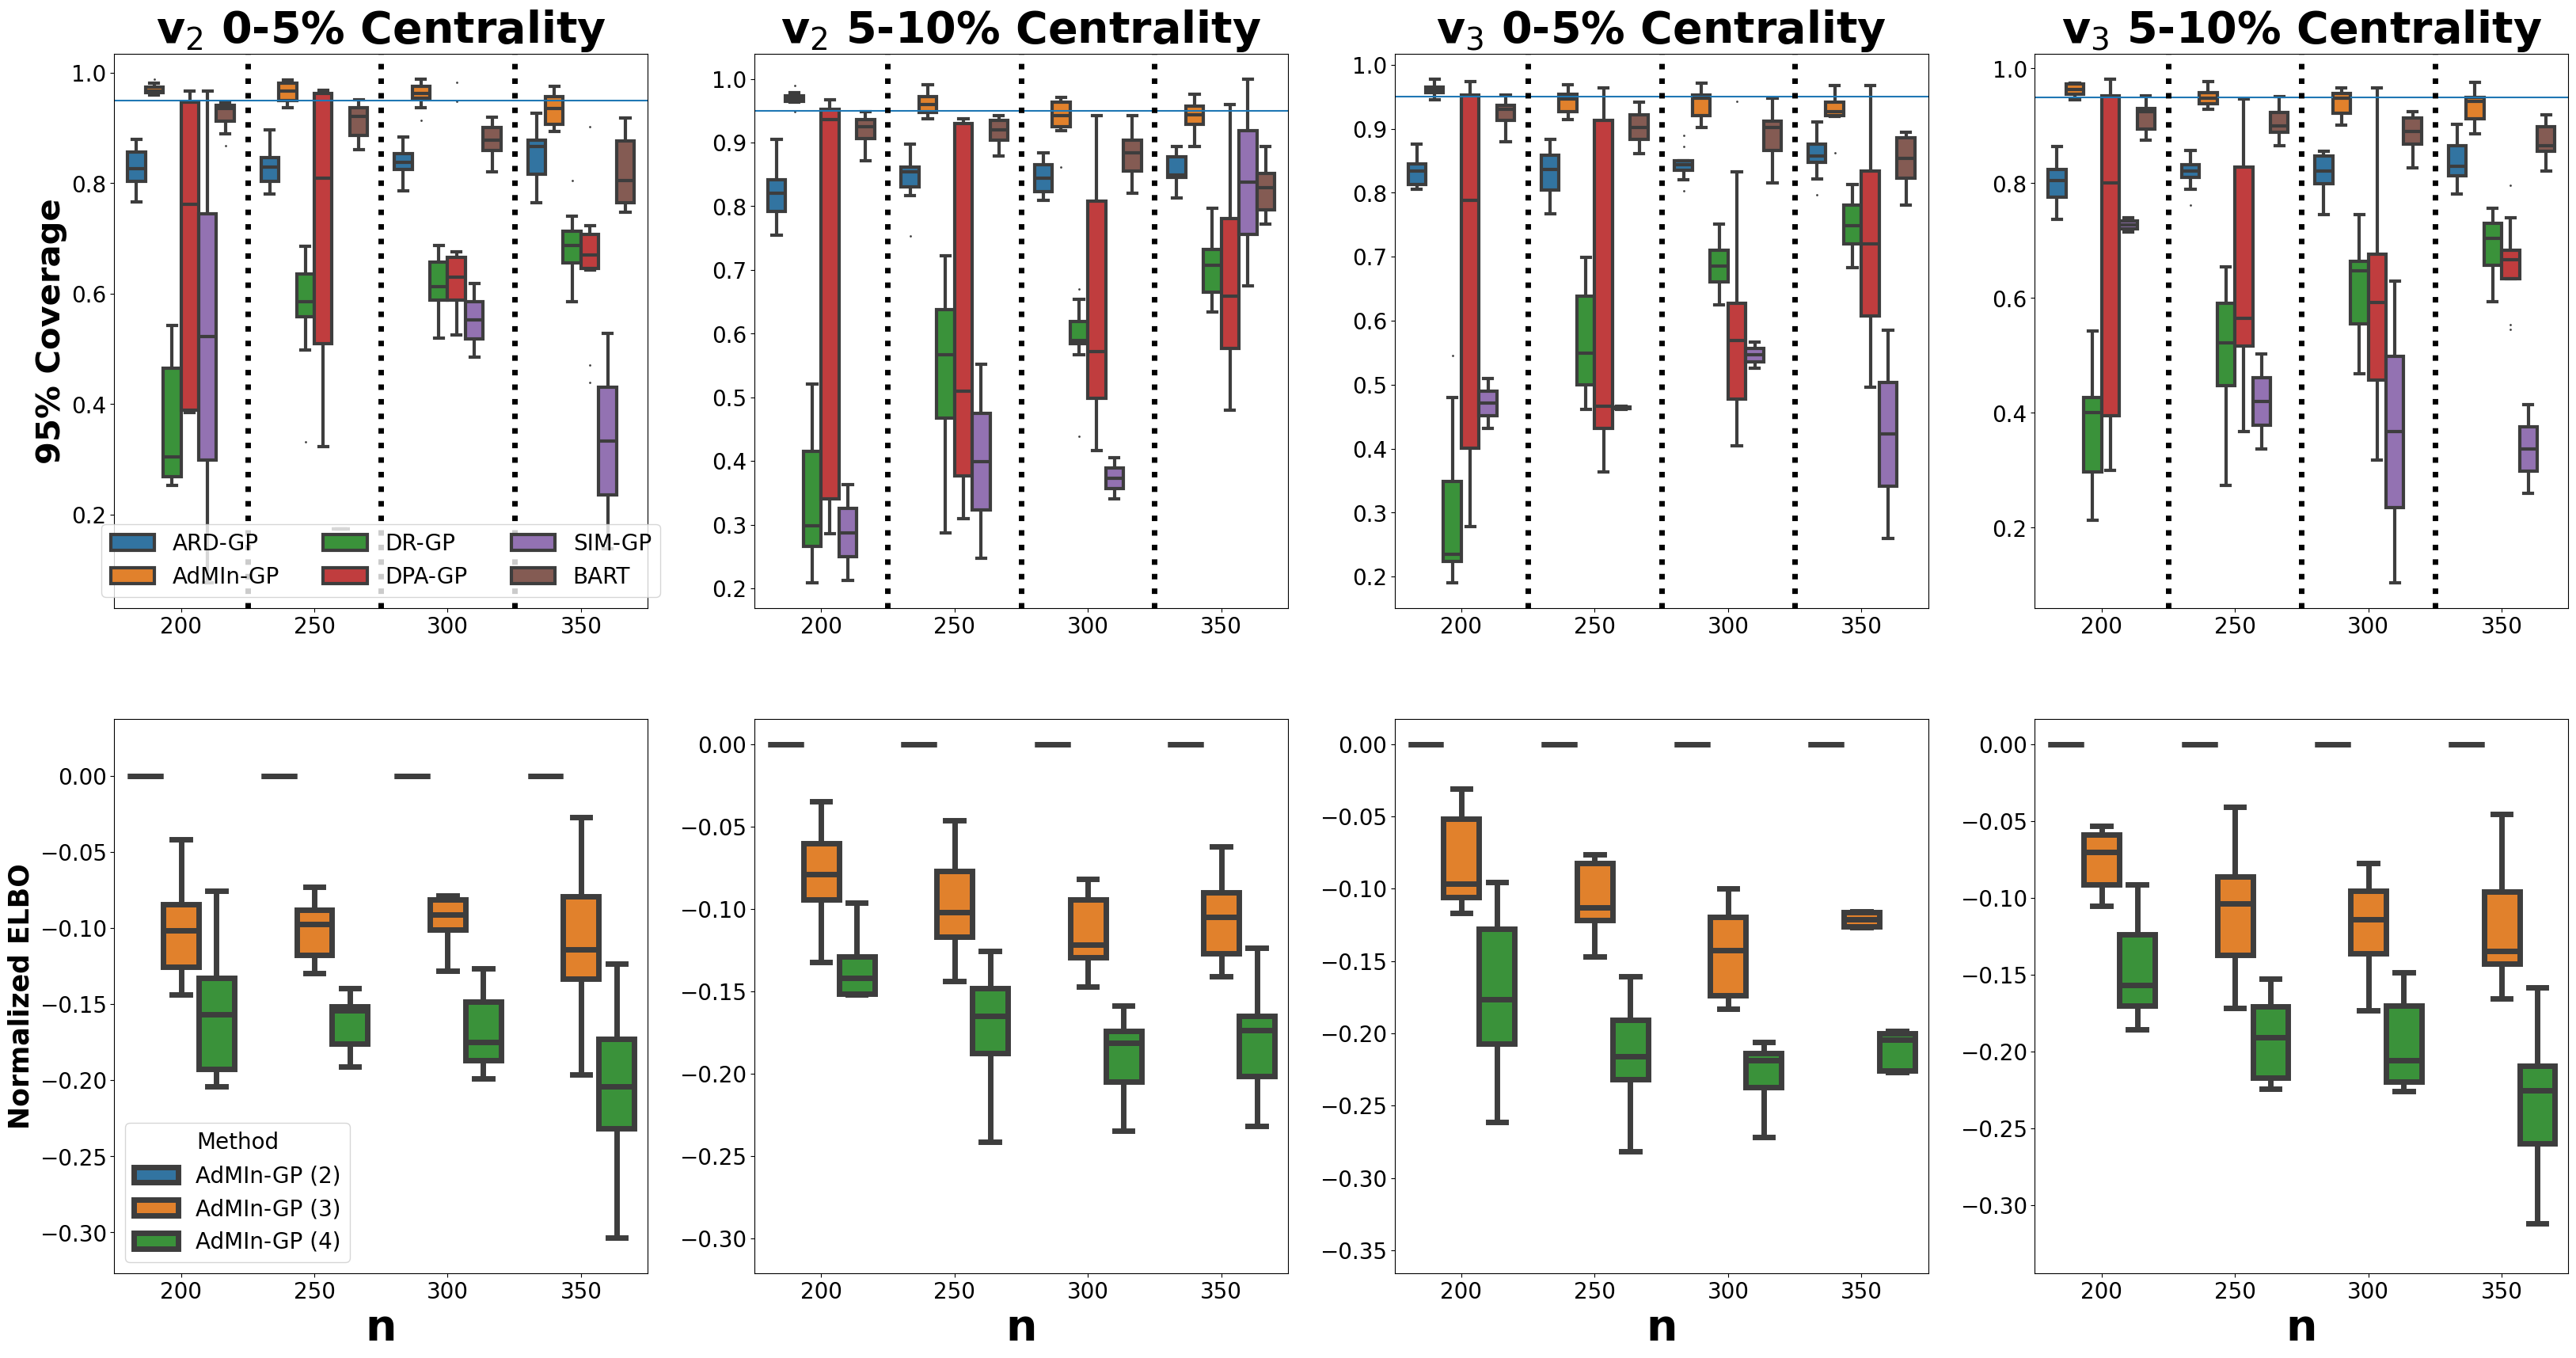

In [4]:
import matplotlib
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)


stat_list = ['95% Coverage']
unit_list = list(unit_replace.values())
fig, axs = plt.subplots(2, 4, figsize = (40, 20))

for k in [0, 1]:
    if k == 0:
        for i, stat in enumerate(stat_list):
            for j, unit in enumerate(unit_list):
                sns.boxplot(data = g_frame[ (g_frame["Statistic"] == stat_list[i]) & (g_frame["Observable"] == unit_list[j]) ], y = "Value", x = "n",  hue = "Method", 
                               ax = axs[0, j], dodge= .25, fliersize=1, linewidth=3)
                
                if j == 0:
                    axs[0, j].set_ylabel(stat_list[i], fontsize=  30, fontweight = 'bold')
                else:
                    axs[0, j].set_ylabel(None)
                
                axs[0, j].set_xlabel("", fontweight = 'bold', fontsize=  40)
                axs[0, j].set_title("{}".format(unit_list[j]), fontweight = 'bold', fontsize = 40)
                
                #if j > 0 and i > 0:
                #    axs[0, j].get_legend().remove()
                if stat == "CRPS":
                    axs[0, j].set_ylim((.12, .55))
                if stat == "NLL":
                    axs[0, j].set_ylim((0, 2))
                '''
                if stat == "rmse":
                    axs[j, i].set_ylim((.2, .5))
                '''
                
                axs[0, j].axhline(y = .95)
            
                #if j > 0:
                #    axs[0, j].get_legend().remove()
                    
                if j ==0:
                    #axs[0, j].legend(loc='upper center', bbox_to_anchor=(0.9, -0.15), ncol=3, fancybox=True, shadow=False)
                    axs[0, j].legend(loc='lower center', ncol=3, fancybox=True, shadow=False)
                if j > 0:
                    axs[0, j].get_legend().remove()
                
                [axs[0, j].axvline(x+.5,linestyle = ":", lw = 5, color = "black") for x in list(axs[0, j].get_xticks())[:-1]]
    
    else:
        folds = 10
        sample_list = [200, 250, 300, 350]
        unit_list = [24, 25, 30, 31]
        stat_list = ['rmse', 'nll', 'crps', 'cov', 'loss']
        meth_list = ['vim2', 'vim3', 'vim4']
        fold_list = [i + 1 for  i in range(folds)]
        combs = it.product(unit_list, meth_list, sample_list, stat_list, fold_list)
        
        start_frame = pd.DataFrame(list(combs), columns = ["Observable", "Method", "n", "Statistic", "Fold"])
        
        
        val = np.zeros(start_frame.shape[0])
        for index, row in start_frame.iterrows():        
            if row[3] == "loss":
                cur_loss = s_dict[row[2]][row[0]][row[4] - 1][row[1]][row[3]].item()
                vim2_loss = s_dict[row[2]][row[0]][row[4] - 1]['vim2'][row[3]].item()
                
                val[index] = (vim2_loss - cur_loss)/vim2_loss
            else:
                val[index] = s_dict[row[2]][row[0]][row[4] - 1][row[1]][row[3]]
                
        g_frame = start_frame.join(pd.DataFrame(val, columns = ["Value"]))
        
        
        stat_replace = {'rmse': 'RMSE', 'crps': "CRPS", 'cov': "95% Coverage", "nll": "NLL", 'loss': "Normalized ELBO"}
        g_frame['Statistic'] = g_frame['Statistic'].replace(stat_replace)
        met_replace = {'gpy': "ARD-GP", 'vim': 'AdMIn-GP', 'vim2': 'AdMIn-GP (2)','dle': 'DLE-GP', 'dpa': 'DPA-GP', 
                      'vim3': "AdMIn-GP (3)", 'vim4': 'AdMIn-GP (4)'}
        g_frame['Method'] = g_frame['Method'].replace(met_replace)
        stat_list = ['RMSE', 'CRPS','95% Coverage', "Normalized ELBO"]
        
        mix_frame = g_frame[g_frame['Method'].isin(["AdMIn-GP", "AdMIn-GP (2)", "AdMIn-GP (3)", "AdMIn-GP (4)"])]
        
        unit_replace = {24: '$\mathbf{v}_2$ 0-5% Centrality', 25:'$\mathbf{v}_2$ 5-10% Centrality' , 30: '$\mathbf{v}_3$ 0-5% Centrality', 31: '$\mathbf{v}_3$ 5-10% Centrality'}
        mix_frame["Observable"] = mix_frame['Observable'].replace(unit_replace)
        
        
        #fig, axs = plt.subplots(1, 4, figsize = (40, 10))
        
        
        
        for i, unit in enumerate(unit_list):
            sns.boxplot(data = mix_frame[np.logical_and(mix_frame["Statistic"] == "Normalized ELBO", mix_frame["Observable"] == unit_replace[unit])],
                            y = "Value", x = "n",  hue = "Method", 
                               ax = axs[1, i], dodge= .25, fliersize= 0, linewidth=5)
            
            if i == 0:
                axs[1, i].set_ylabel("Normalized ELBO", fontsize = 25, fontweight = "bold")
            else:
                 axs[1, i].set_ylabel(None)
                    
            #axs[1, i].set_title(unit_replace[unit], fontsize = 40, fontweight = "bold")
            if i > 0:
                axs[1, i].get_legend().remove()
            axs[1, i].set_xlabel("n", fontweight = 'bold', fontsize=  40)

    
        
        

    #plt.savefig('paper_plots/real_cov.png', dpi = 200, bbox_inches='tight')

'''
# loss functions##
import copy
# load new data
real_dict = pd.read_pickle("au_data/EmuResults.pickle")
s_dict = copy.deepcopy(real_dict)



folds = 10
sample_list = [200, 250, 300, 350]
unit_list = [24, 25, 30, 31]
stat_list = ['rmse', 'nll', 'crps', 'cov', 'loss']
meth_list = ['vim2', 'vim3', 'vim4']
fold_list = [i + 1 for  i in range(folds)]
combs = it.product(unit_list, meth_list, sample_list, stat_list, fold_list)

start_frame = pd.DataFrame(list(combs), columns = ["Observable", "Method", "n", "Statistic", "Fold"])


val = np.zeros(start_frame.shape[0])
for index, row in start_frame.iterrows():        
    if row[3] == "loss":
        cur_loss = s_dict[row[2]][row[0]][row[4] - 1][row[1]][row[3]].item()
        vim2_loss = s_dict[row[2]][row[0]][row[4] - 1]['vim2'][row[3]].item()
        
        val[index] = (vim2_loss - cur_loss)/vim2_loss
    else:
        val[index] = s_dict[row[2]][row[0]][row[4] - 1][row[1]][row[3]]
        
g_frame = start_frame.join(pd.DataFrame(val, columns = ["Value"]))


stat_replace = {'rmse': 'RMSE', 'crps': "CRPS", 'cov': "95% Coverage", "nll": "NLL", 'loss': "Normalized ELBO"}
g_frame['Statistic'] = g_frame['Statistic'].replace(stat_replace)
met_replace = {'gpy': "ARD-GP", 'vim': 'AdMIn-GP', 'vim2': 'AdMIn-GP (2)','dle': 'DLE-GP', 'dpa': 'DPA-GP', 
              'vim3': "AdMIn-GP (3)", 'vim4': 'AdMIn-GP (4)'}
g_frame['Method'] = g_frame['Method'].replace(met_replace)
stat_list = ['RMSE', 'CRPS','95% Coverage', "Normalized ELBO"]

mix_frame = g_frame[g_frame['Method'].isin(["AdMIn-GP", "AdMIn-GP (2)", "AdMIn-GP (3)", "AdMIn-GP (4)"])]

unit_replace = {24: '$\mathbf{v}_2$ 0-5% Centrality', 25:'$\mathbf{v}_2$ 5-10% Centrality' , 30: '$\mathbf{v}_3$ 0-5% Centrality', 31: '$\mathbf{v}_3$ 5-10% Centrality'}
mix_frame["Observable"] = mix_frame['Observable'].replace(unit_replace)


#fig, axs = plt.subplots(1, 4, figsize = (40, 10))



for i, unit in enumerate(unit_list):
    sns.boxplot(data = mix_frame[np.logical_and(mix_frame["Statistic"] == "Normalized ELBO", mix_frame["Observable"] == unit_replace[unit])],
                    y = "Value", x = "n",  hue = "Method", 
                       ax = axs[1, i], dodge= .25, fliersize= 0, linewidth=5)
    
    if i == 0:
        axs[1, i].set_ylabel("Normalized ELBO", fontsize = 25, fontweight = "bold")
    else:
         axs[1, i].set_ylabel(None)
            
    axs[1, i].set_title(unit_replace[unit], fontsize = 40, fontweight = "bold")
'''
plt.savefig('paper_plots/cov_admin_elbo.png', dpi = 200, bbox_inches='tight')


# Figure 10

<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\h'
<>:37: SyntaxWarning: invalid escape sequence '\h'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\h'
<>:37: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_1492585/3196620573.py:12: SyntaxWarning: invalid escape sequence '\m'
  unit_replace = {24: '$\mathbf{v}_2$ 0-5% Centrality', 25:'$\mathbf{v}_2$ 5-10% Centrality' , 30: '$\mathbf{v}_3$ 0-5% Centrality', 31: '$\mathbf{v}_3$ 5-10% Centrality'}
/tmp/ipykernel_1492585/3196620573.py:12: SyntaxWarning: invalid escape sequence '\m'
  unit_replace = {24: '$\mathbf{v}_2$ 0-5% Cen

1
2
3


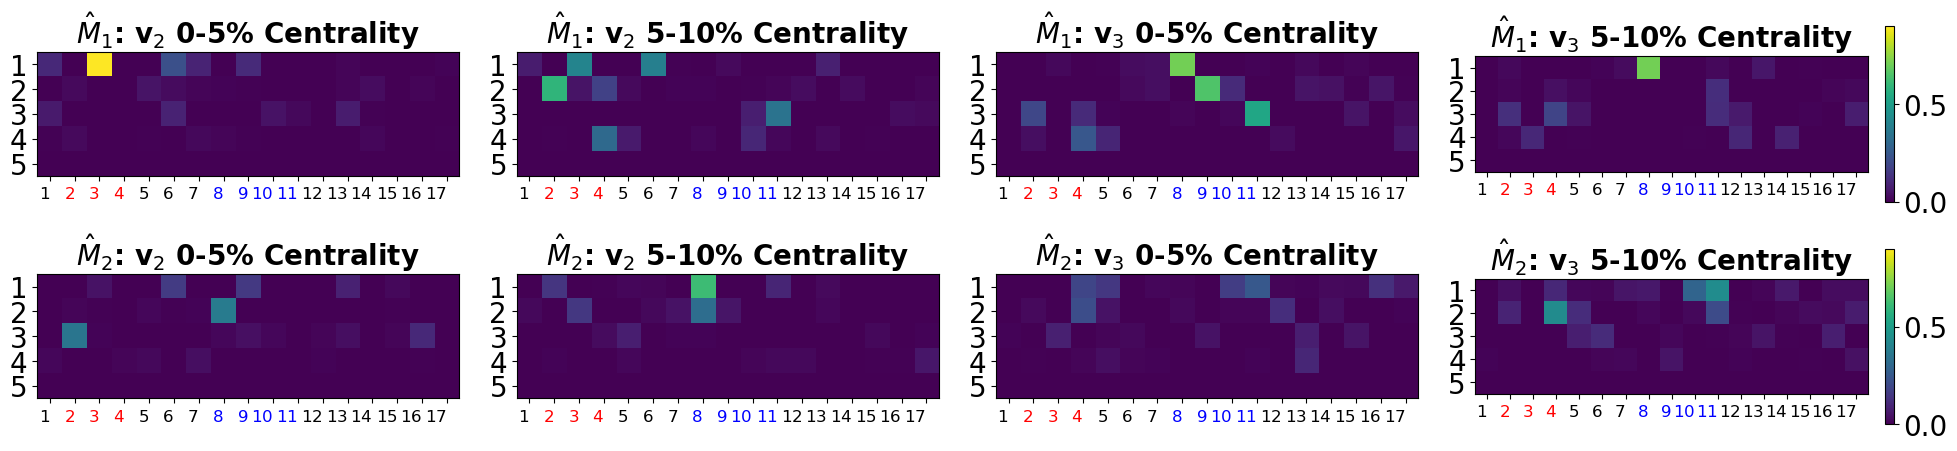

In [6]:
import pickle
obs_list = np.genfromtxt('au_data/au_y.txt', dtype=None, delimiter=',', names=True).dtype.names
u_list = [24, 25, 30, 31]
with open(r"au_data/t_list", "rb") as input_file:
    t_list = pickle.load(input_file)

    
fig, axs = plt.subplots(nrows=2, ncols=4, figsize = (20, 5))
xcol = np.genfromtxt('au_data/au_design.txt', dtype=None, delimiter=',', names=True).dtype.names
xcol = ["${}$".format("{{{}}}".format(i)) for i in range(1, len(xcol) + 1)]
ycol = np.arange(5) + 1
unit_replace = {24: '$\mathbf{v}_2$ 0-5% Centrality', 25:'$\mathbf{v}_2$ 5-10% Centrality' , 30: '$\mathbf{v}_3$ 0-5% Centrality', 31: '$\mathbf{v}_3$ 5-10% Centrality'}



for i, t in enumerate(t_list):
    M1 = (t.A_list[0].cpu().detach().numpy())
    M2 = (t.A_list[1].cpu().detach().numpy())
    
    
    #M1
    M_list = [M1.copy(), M2.copy()]
    Mval = np.argmax([np.square(M1).sum(), np.square(M2).sum()])
    other = -(1-Mval)
    M1 = M_list[Mval].copy()
    M2 = M_list[other].copy()
    
    m1_idx = (-np.square(M1).sum(1)).argsort()
    m2_idx = (-np.square(M2).sum(1)).argsort()
     
    vmax = np.max(np.abs(np.concatenate([M1, M2], axis = 0)))
    ax1 = axs[0, i].imshow( M1[m1_idx, :], vmin = 0, vmax = .9, cmap = 'viridis')
    #axs[0].axis('off')
    axs[0, i].set_title("$\hat M_1$: {}".format(unit_replace[u_list[i]]), fontsize = 20, fontweight = "bold")
    ax2 = axs[1,i].imshow(M2[m2_idx, :], vmin = 0, vmax = .9, cmap = 'viridis')
    #axs[1].axis('off')
    axs[1,i].set_title("$\hat M_2$: {}".format(unit_replace[u_list[i]]), fontsize = 20, fontweight = "bold")
    

    if i == 3:
        cb2 = fig.colorbar(ax2, fraction=0.03, pad=0.04, orientation = 'vertical')
        cb1 = fig.colorbar(ax1, fraction=0.03, pad=0.04, orientation = 'vertical')


    axs[0,i].set_xticks(np.arange(len(xcol)))
    #axs[0,i].get_xaxis().set_visible(False)
    axs[0,i].set_yticks(np.arange(len(ycol)))
    axs[0,i].set_xticklabels(xcol)
    axs[0,i].set_yticklabels(ycol)

    plt.setp(axs[0,i].get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor", fontsize = 12, fontweight = "bold")

    axs[1,i].set_xticks(np.arange(len(xcol)))
    axs[1,i].set_yticks(np.arange(len(ycol)))
    axs[1,i].set_xticklabels(xcol)
    axs[1,i].set_yticklabels(ycol)

    plt.setp(axs[1,i].get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor", fontsize = 12, fontweight = 'bold')

mycolors = []
for i in range(17):
    if i > 0 and i < 4:
        print(i)
        mycolors.append("r")
    elif i < 11 and i > 6:
        mycolors.append("b")
    else:
        mycolors.append("black")

for i in range(0, 4):
    for j in range(2):
        for k, c in enumerate(mycolors):
            axs[j, i].get_xticklabels()[k].set_color(c)

    
for i in range(4):
    box = axs[1, i].get_position()
    box.y0 = box.y0 - 0.1
    box.y1 = box.y1 - 0.1
    axs[1,i].set_position(box)


fig.tight_layout()

    
plt.savefig('paper_plots/embed_qgp.png', dpi = 200, bbox_inches='tight')